In [1]:
from sklearn import decomposition
from run_preprocessing import load_data
from display import Display

import numpy as np
import matplotlib.pyplot as plt

In [2]:
eye_dataset_path= './dataset/processed_eye_motion_dataset.pickle'

In [3]:
eye_dataset = load_data(eye_dataset_path, 10)
len(eye_dataset)

10

In [4]:
landmark_list = []
for ed in eye_dataset:
    for clip_info in ed['clip_info']:
        for clip_landmarks in clip_info['landmarks']:
            for landmarks in clip_landmarks:
                landmark_list.append(landmarks)

landmark_array = np.array(landmark_list)
n_samples, n_features = landmark_array.shape
print('[INFO] n_samples:{}, n_features:{}'.format(n_samples, n_features))

[INFO] n_samples:20969, n_features:50


In [5]:
data = landmark_array[:, :-2]
data[0]

array([ 95,  94, 207,  99,  80, 101,  91,  93, 108,  93, 122, 101, 108,
       104,  91, 106, 189, 106, 203,  98, 218,  99, 231, 111, 218, 112,
       202, 111,  54,  75,  67,  59,  86,  51, 108,  52, 129,  62, 190,
        64, 208,  55, 228,  55, 246,  67, 254,  85])

In [6]:
n_row, n_col = 4, 6
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2.*3 * n_col, 1.5*3 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp, cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.01, 0.99, 0.99, 0.05, 0)

In [7]:
# samples = list(landmark_array[:6])
# display = Display(180, 320)
# sample_images = []
# for s in samples:
#     img = display.draw_frame(s, False)
#     sample_images.append(img)
# plot_gallery('Samples', sample_images)

In [8]:
display = Display(180, 320)

In [9]:
n_components = 6
estimator = decomposition.PCA(n_components, svd_solver='randomized', whiten=True)
estimator.fit(data)
estimator.explained_variance_ratio_

array([ 0.51126761,  0.20795326,  0.10153749,  0.07173007,  0.04443029,
        0.01851537])

In [10]:
mean_expression = np.array([0,0,0,0,0,0])
m_0 = np.diag([4]*6)
m_1 = np.diag([2]*6)
m_2 = np.diag([-2]*6)
m_3 = np.diag([-4]*6)
pca_subspace = np.concatenate((m_0, m_1, m_2, m_3), axis=0)
pca_subspace

array([[ 4,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  4],
       [ 2,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  2],
       [-2,  0,  0,  0,  0,  0],
       [ 0, -2,  0,  0,  0,  0],
       [ 0,  0, -2,  0,  0,  0],
       [ 0,  0,  0, -2,  0,  0],
       [ 0,  0,  0,  0, -2,  0],
       [ 0,  0,  0,  0,  0, -2],
       [-4,  0,  0,  0,  0,  0],
       [ 0, -4,  0,  0,  0,  0],
       [ 0,  0, -4,  0,  0,  0],
       [ 0,  0,  0, -4,  0,  0],
       [ 0,  0,  0,  0, -4,  0],
       [ 0,  0,  0,  0,  0, -4]])

In [11]:
subspace = estimator.inverse_transform(pca_subspace)
subspace

array([[  76.67850907,   90.41949151,  189.29767504, ...,   66.29544384,
         222.0427276 ,   80.3468952 ],
       [ 104.43711824,   82.81470131,  215.88872178, ...,   82.85351975,
         263.58855344,  103.42559734],
       [  96.3899697 ,  107.46173505,  212.60250407, ...,   70.57903946,
         263.16326623,   91.00598651],
       ..., 
       [ 102.27329612,   94.23158655,  207.29214069, ...,   69.86405905,
         259.28185058,   80.59034506],
       [ 108.81988214,   84.9226306 ,  221.22591992, ...,   68.62522152,
         259.45071566,   87.37919691],
       [  89.53179006,   92.86168981,  200.2851744 , ...,   61.21786985,
         263.87579443,   76.60995824]])

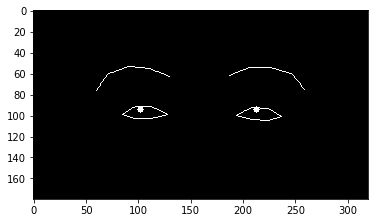

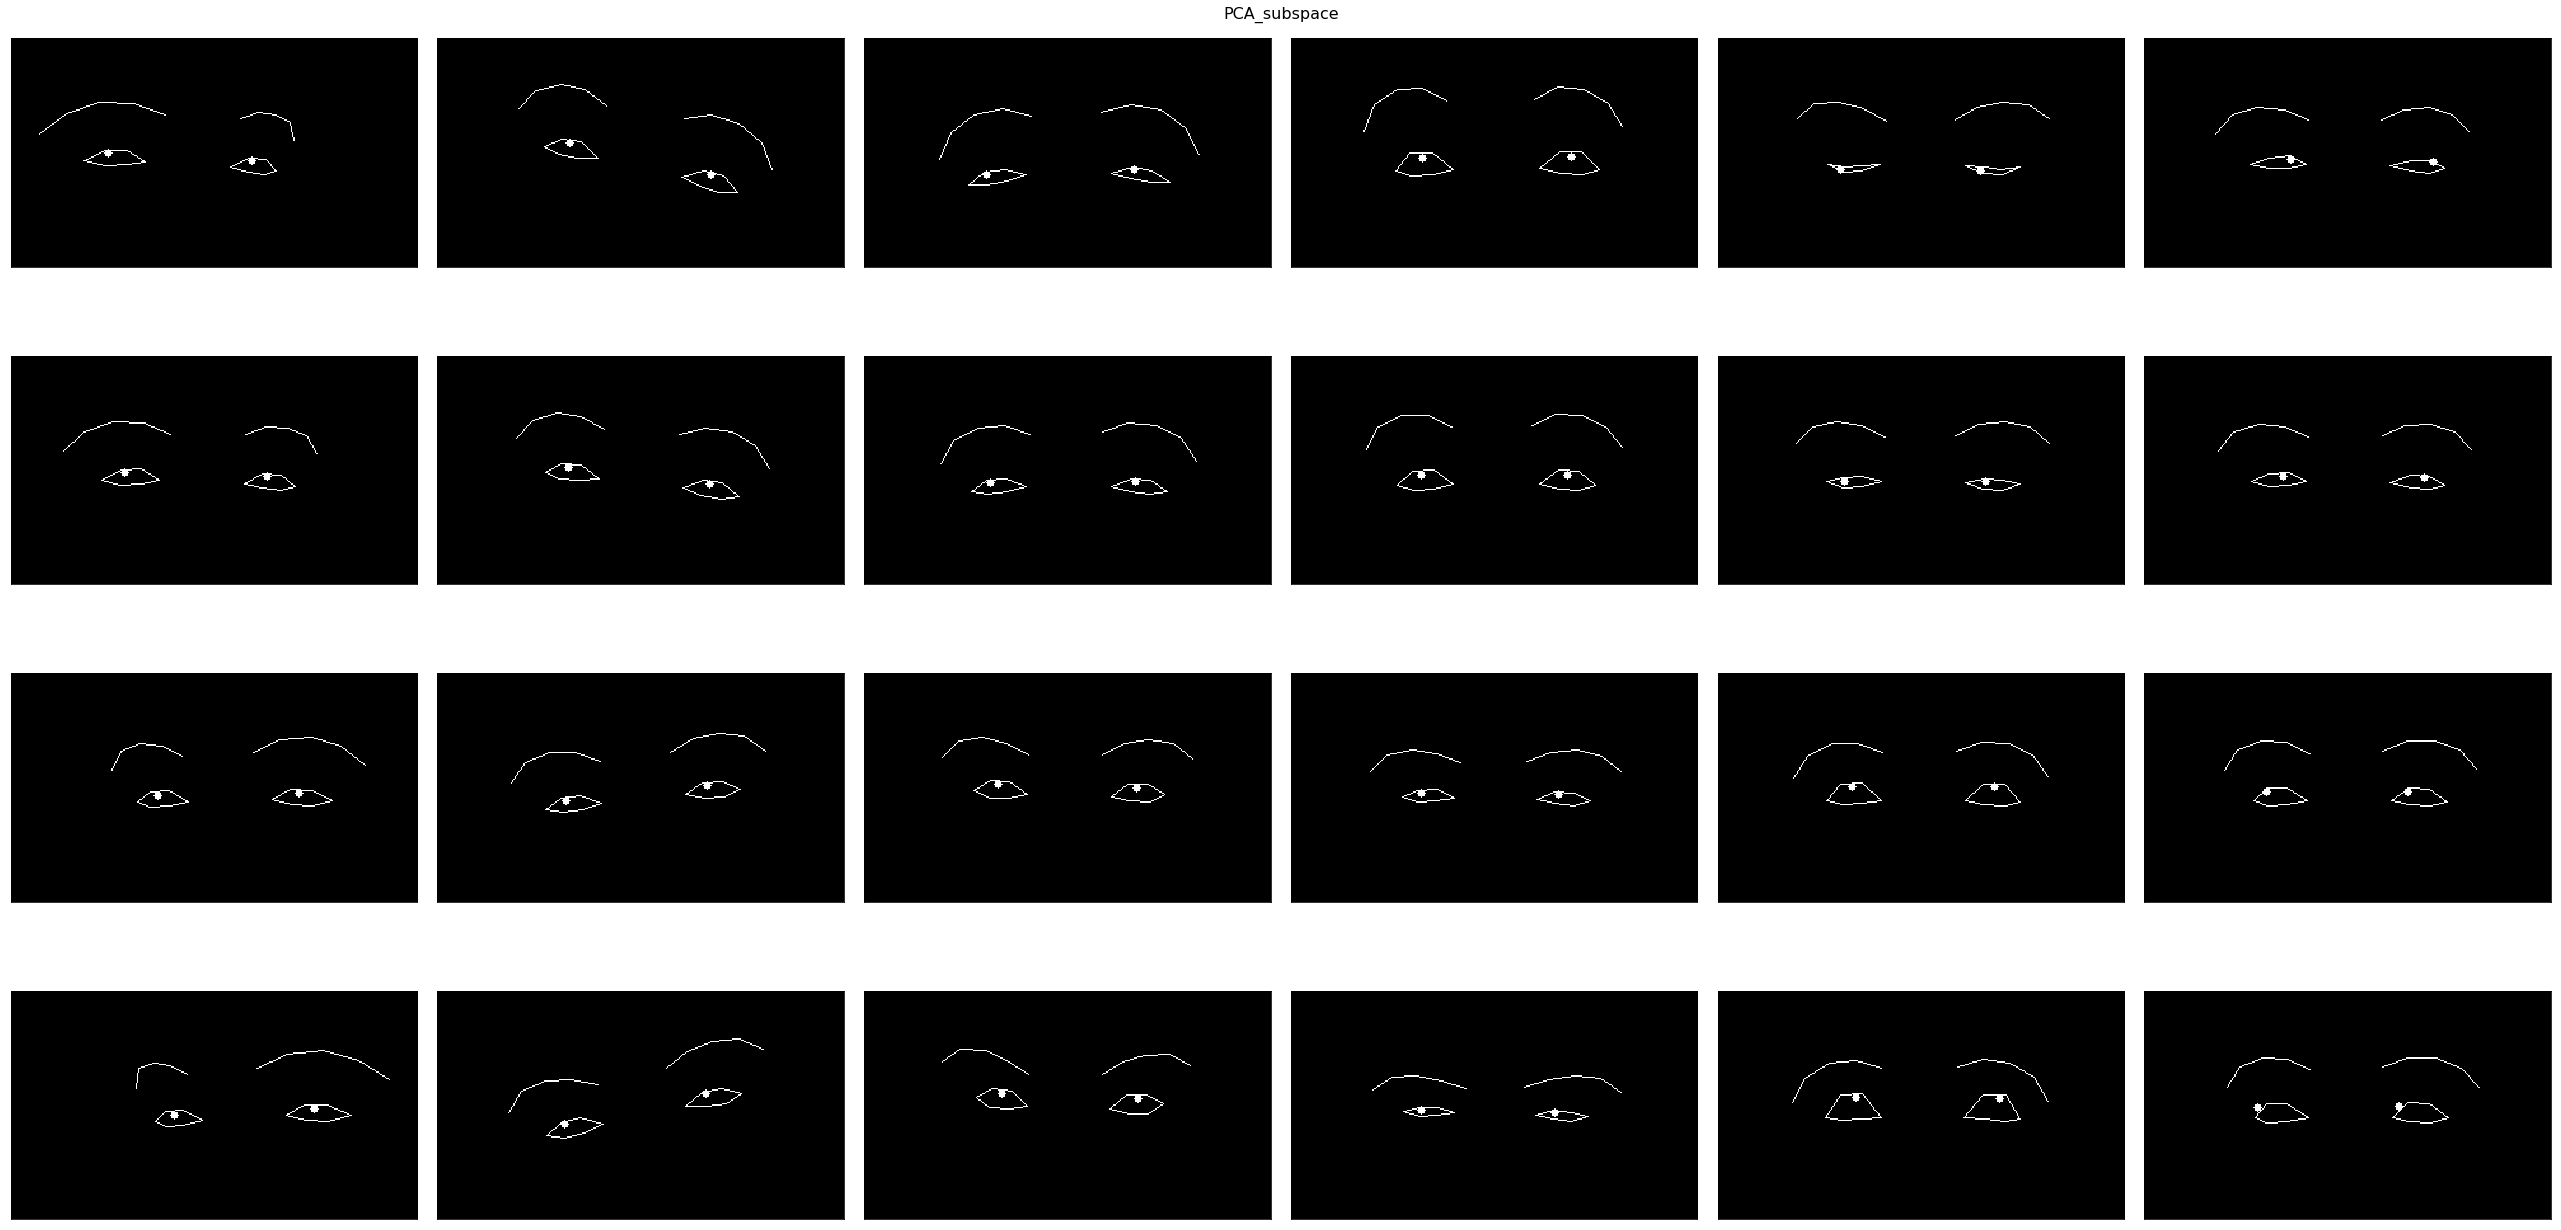

In [13]:
# mean expression
mean = estimator.inverse_transform(mean_expression)
mean = [int(o) for o in list(mean)]
# pca subspace expression
images = []
for space in subspace:
    inversed = [int(s) for s in space]
    img = display.draw_frame(inversed, False)
    images.append(img)

plt.imshow(display.draw_frame(mean, False))
plot_gallery('PCA_subspace', images)
plt.show()